In [7]:
import nltk 

In [69]:
#nltk.download('all')

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization

from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,RidgeCV

from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV

from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)

import pandas as pd

import spacy

from spacy import displacy



import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
import string


import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [10]:
df = pd.read_csv('UpdatedResumeDataSet.csv')


In [11]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [12]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [13]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

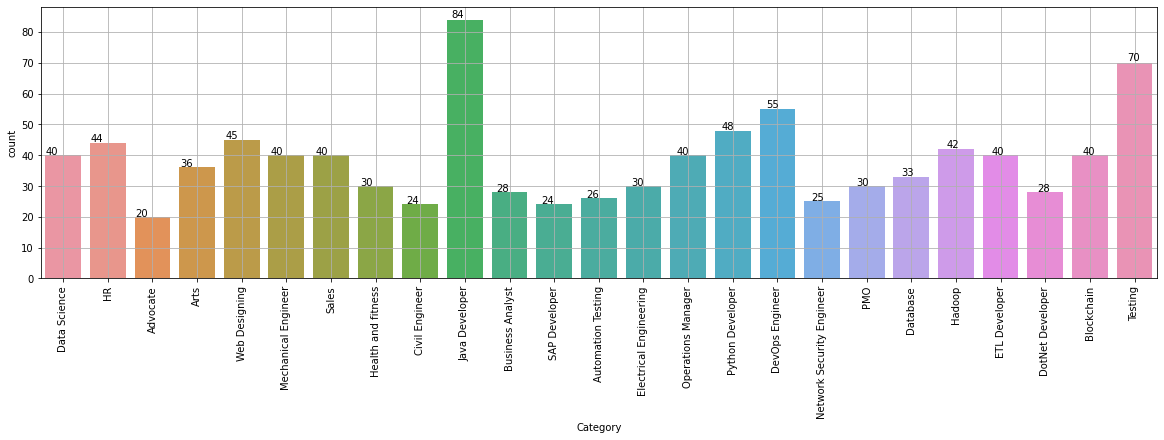

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

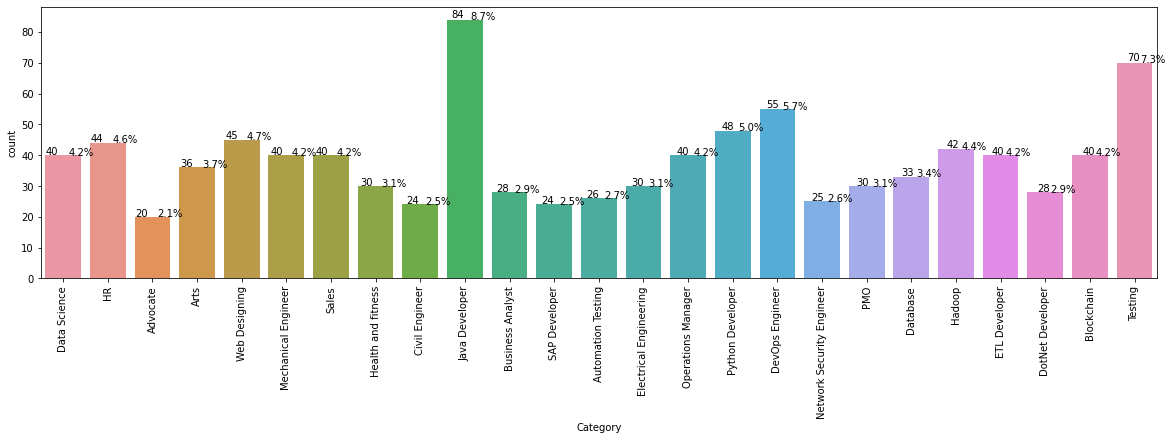

In [15]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [16]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [17]:
df_t = df.copy()

In [18]:

import re
import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))



In [19]:
from nltk.corpus import stopwords
def get_word_freq(df_data):
    oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
    totalWords =[]
    Sentences = df_data['Resume'].values
    cleanedSentences = ""
    for records in Sentences:
        cleanedText = cleanResume(records)
        cleanedSentences += cleanedText
        requiredWords = nltk.word_tokenize(cleanedText)
        for word in requiredWords:
            if word not in oneSetOfStopWords and word not in string.punctuation:
                totalWords.append(word)

    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(50)
    print(mostcommon)
    return mostcommon, cleanedSentences

In [20]:
mostcommon, cleanedSentences = get_word_freq(df)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [21]:
def get_wc(cleanedSentences):
    wc = WordCloud().generate(cleanedSentences)
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

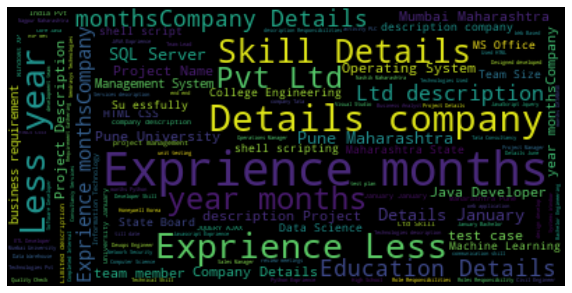

In [22]:
get_wc(cleanedSentences)

In [23]:
df['Category_la'] = df['Category']
labelencoder = LabelEncoder()

df['Category']  = labelencoder.fit_transform(df["Category_la"])

In [24]:
df.head()

,Category,Resume,Category_la
0,6,Skills Programming Languages Python pandas num...,Data Science
1,6,Education Details May 2013 to May 2017 B E UIT...,Data Science
2,6,Areas of Interest Deep Learning Control System...,Data Science
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Data Science
4,6,Education Details MCA YMCAUST Faridabad Haryan...,Data Science


In [25]:
###########################copy df before
# multiclass classification proplem



In [26]:
def get_plot(df_data):
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    ax=sns.countplot(x="Category", data=df_data)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    plt.grid()

  

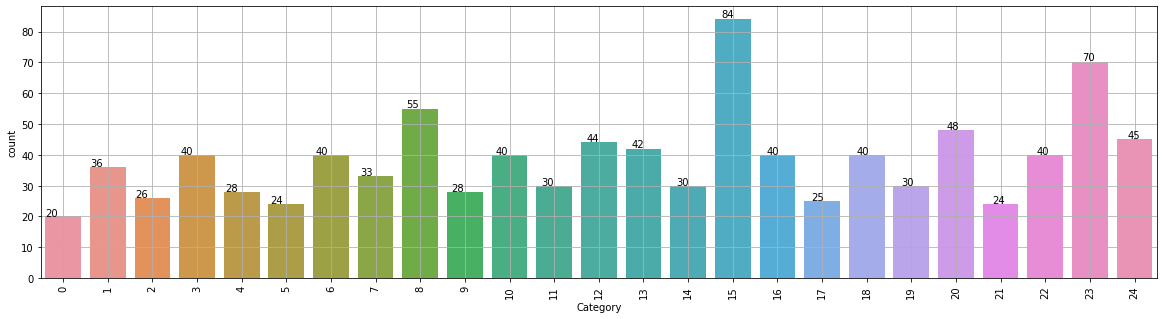

In [27]:
get_plot(df)

In [28]:
df.head()

,Category,Resume,Category_la
0,6,Skills Programming Languages Python pandas num...,Data Science
1,6,Education Details May 2013 to May 2017 B E UIT...,Data Science
2,6,Areas of Interest Deep Learning Control System...,Data Science
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Data Science
4,6,Education Details MCA YMCAUST Faridabad Haryan...,Data Science


In [29]:
df.head()

,Category,Resume,Category_la
0,6,Skills Programming Languages Python pandas num...,Data Science
1,6,Education Details May 2013 to May 2017 B E UIT...,Data Science
2,6,Areas of Interest Deep Learning Control System...,Data Science
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Data Science
4,6,Education Details MCA YMCAUST Faridabad Haryan...,Data Science


In [30]:
df.Category_la.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14      

In [33]:
pd.DataFrame(WordFeatures.toarray(), columns=word_vectorizer.get_feature_names()) #

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,01,07,10,10g,11,11g,12,13,14,15,16,17,19,20,2000,2003,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,21,24,26,27,28,2nd,30,300,31,36,39,3d,400,48,60,72,85,96,abap,ability,able,academic,academy,achieve,achieved,achievements,achieving,act,action,actions,active,actively,activities,activity,actual,ad,added,adding,address,adherence,admin,administration,administrative,administrator,advance,advanced,agile,agreed,aim,air,ajax,al,algorithms,allahabad,allow,amravati,analysis,analyst,analysts,analytical,analytics,analyze,analyzed,analyzing,android,angular,annual,ant,apache,api,app,application,applications,applying,appropriate,april,architect,architecture,area,areas,arranging,arts,asa,asp,assembly,assessment,asset,assigned,assigning,assist,assistant,assisting,associated,association,assurant,attend,attendance,attending,attitude,audit,audits,aug,august,auto,autocad,automate,automated,automation,autosys,availability,available,aws,azure,b2b,bachelor,backend,backup,backups,bajaj,bangalore,bank,banking,barclays,base,based,basic,basically,basics,basis,bazar,bbl,benefits,bengaluru,best,bi,big,billing,bitbucket,bitcoin,black,blockchain,bny,bo,board,bods,bom,bombay,bond,books,bootstrap,box,branch,branches,breaker,british,bsc,budget,budgets,bug,bugs,build,builder,building,builds,built,business,businesses,cabinets,cable,cad,calculation,calls,capabilities,capacity,capgemini,capital,car,card,cards,care,carrying,case,cases,cash,categories,cause,causes,cbs,center,central,centre,certificate,certification,certified,chain,challenges,change,changes,channel,channels,check,checking,checkpoint,checks,chennai,ci,circuit,cisco,civil,classes,clear,clearance,client,clients,clinical,closely,closing,cloud,cloudera,cluster,...,sharing,shell,shipments,shipping,simple,single,site,sites,size,skill,skills,sla,sloan,smart,smooth,social,softgst,software,solidity,solution,solutions,solving,sound,source,sources,sourcing,space,spark,special,specially,specific,specification,specifications,spoc,sports,spring,sql,sqoop,sr,sri,ssc,st,staff,staffing,stage,staging,stake,stakeholders,standard,standards,startup,state,static,station,stations,status,stipulated,stock,storage,store,stored,stores,strategic,strategies,strategy,strength,strengths,strong,structure,structured,student,studio,su,sub,sublime,submission,suggest,suggesting,summary,sun,supervising,supplier,suppliers,supplies,supply,support,supported,supporting,sure,svn,switches,switching,synopsis,systems,tableau,tables,taking,talend,talent,tally,target,targets,task,tasks,tat,tata,tax,tcs,team,teams,tech,technical,techniques,techno,technologies,technology,telangana,telecommunication,telephonic,temperature,tenure,terms,test,tested,testing,tests,text,thai,thinking,ticket,tickets,till,time,timelines,timely,times,title,tomcat,tool,tools,track,tracker,tracking,trade,trained,trainer,training,transaction,transactions,transfer,transform,transformations,transformer,transformers,transition,transport,travel,trends,troubleshoot,troubleshooting,trust,trustbank,tuning,type,types,uat,ubuntu,ui,uk,understand,understanding,undertaking,unit,united,units,universe,university,unix,update,updates,updating,upgrade,upgrades,ups,urate,urately,usa,usage,use,used,user,users,using,utilities,utility,utilization,uttar,validate,validation,value,valves,various,vendor,vendors,version,view,views,virtual,visa,visio,vision,visit,vista,visual,visualization,volume,vpn,wallet,warehouse,warehousing,water,wave,ways,web,webi,website,weekly,wide,win,windows,wipro,wiring,word,work,worked,workflow,working,works,workshop,world,worldwide,writing,written,wrote,www,xml,xp,year,years,zone
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.066461,0.0,0.0,0.000000,0.000000,

K-Mean

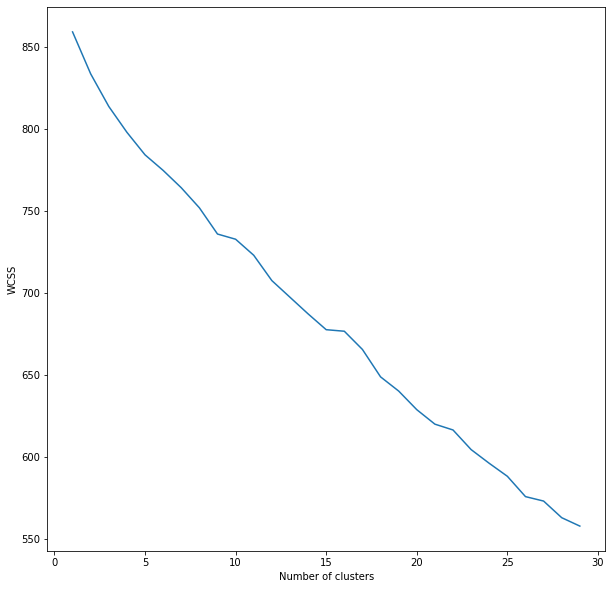

In [34]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1,30):
    model_Ilbo = KMeans(n_clusters = i, init = "k-means++")
    model_Ilbo.fit(WordFeatures)
    wcss.append(model_Ilbo.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
df['Category_C'] = ''

In [36]:
df.loc[df['Category_la'] == "Data Science", 'Category_C'] = 1
df.loc[df['Category_la'] == "HR", 'Category_C'] = 0
df.loc[df['Category_la'] == "Advocate", 'Category_C'] = 0
df.loc[df['Category_la'] == "Arts", 'Category_C'] = 3
df.loc[df['Category_la'] == "Mechanical Engineer", 'Category_C'] = 2
df.loc[df['Category_la'] == "Sales", 'Category_C'] = 3
df.loc[df['Category_la'] == "Health and fitness", 'Category_C'] = 3
df.loc[df['Category_la'] == "Civil Engineer", 'Category_C'] = 2
df.loc[df['Category_la'] == "Java Developer", 'Category_C'] = 1
df.loc[df['Category_la'] == "Business Analyst", 'Category_C'] = 0
df.loc[df['Category_la'] == "Web Designing", 'Category_C'] = 1
df.loc[df['Category_la'] == "SAP Developer", 'Category_C'] = 1
df.loc[df['Category_la'] == "Automation Testing", 'Category_C'] = 1
df.loc[df['Category_la'] == "Electrical Engineering", 'Category_C'] = 2
df.loc[df['Category_la'] == "Operations Manager", 'Category_C'] = 0
df.loc[df['Category_la'] == "Python Developer", 'Category_C'] = 1
df.loc[df['Category_la'] == "DevOps Engineer", 'Category_C'] = 1
df.loc[df['Category_la'] == "Network Security Engineer", 'Category_C'] = 1
df.loc[df['Category_la'] == "PMO", 'Category_C'] = 0
df.loc[df['Category_la'] == "Database", 'Category_C'] = 1
df.loc[df['Category_la'] == "Hadoop", 'Category_C'] = 1
df.loc[df['Category_la'] == "ETL Developer", 'Category_C'] = 1
df.loc[df['Category_la'] == "DotNet Developer", 'Category_C'] = 1
df.loc[df['Category_la'] == "Blockchain", 'Category_C'] = 1
df.loc[df['Category_la'] == "Testing", 'Category_C'] = 1



In [37]:
df.head()

,Category,Resume,Category_la,Category_C
0,6,Skills Programming Languages Python pandas num...,Data Science,1
1,6,Education Details May 2013 to May 2017 B E UIT...,Data Science,1
2,6,Areas of Interest Deep Learning Control System...,Data Science,1
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Data Science,1
4,6,Education Details MCA YMCAUST Faridabad Haryan...,Data Science,1


In [38]:
df.Category_C=df.Category_C.astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     962 non-null    int64 
 1   Resume       962 non-null    object
 2   Category_la  962 non-null    object
 3   Category_C   962 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 30.2+ KB


In [40]:
num_clusters = 25
km = KMeans(n_clusters=num_clusters,init = "k-means++")
km.fit(WordFeatures)
centers = np.array(km.cluster_centers_)

print(centers)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01180998 ... 0.03034741 0.02961438 0.        ]
 [0.02392265 0.         0.0170415  ... 0.00786139 0.00765799 0.00818297]
 ...
 [0.         0.06049799 0.         ... 0.02492513 0.         0.        ]
 [0.         0.         0.00681351 ... 0.02140516 0.0164929  0.        ]
 [0.         0.         0.         ... 0.08964936 0.0312448  0.        ]]


In [41]:
from sklearn.decomposition import PCA
pca = PCA(4)
data_pca = pca.fit_transform(WordFeatures.toarray())
data_pca

array([[ 0.05769601,  0.18374351,  0.0178255 ,  0.06462001],
       [-0.09244303, -0.01562123, -0.02649986,  0.12170292],
       [-0.1626131 ,  0.02502316, -0.07594859, -0.00758626],
       ...,
       [ 0.07598632, -0.19207814, -0.0679214 , -0.24975844],
       [-0.21060818, -0.12896665, -0.07731676, -0.19198006],
       [-0.0434078 ,  0.17126833,  0.02889953, -0.21822937]])

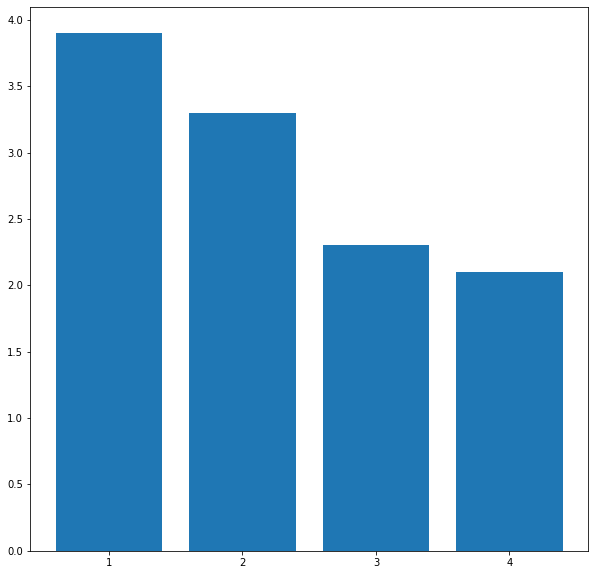

In [42]:
import numpy as np
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

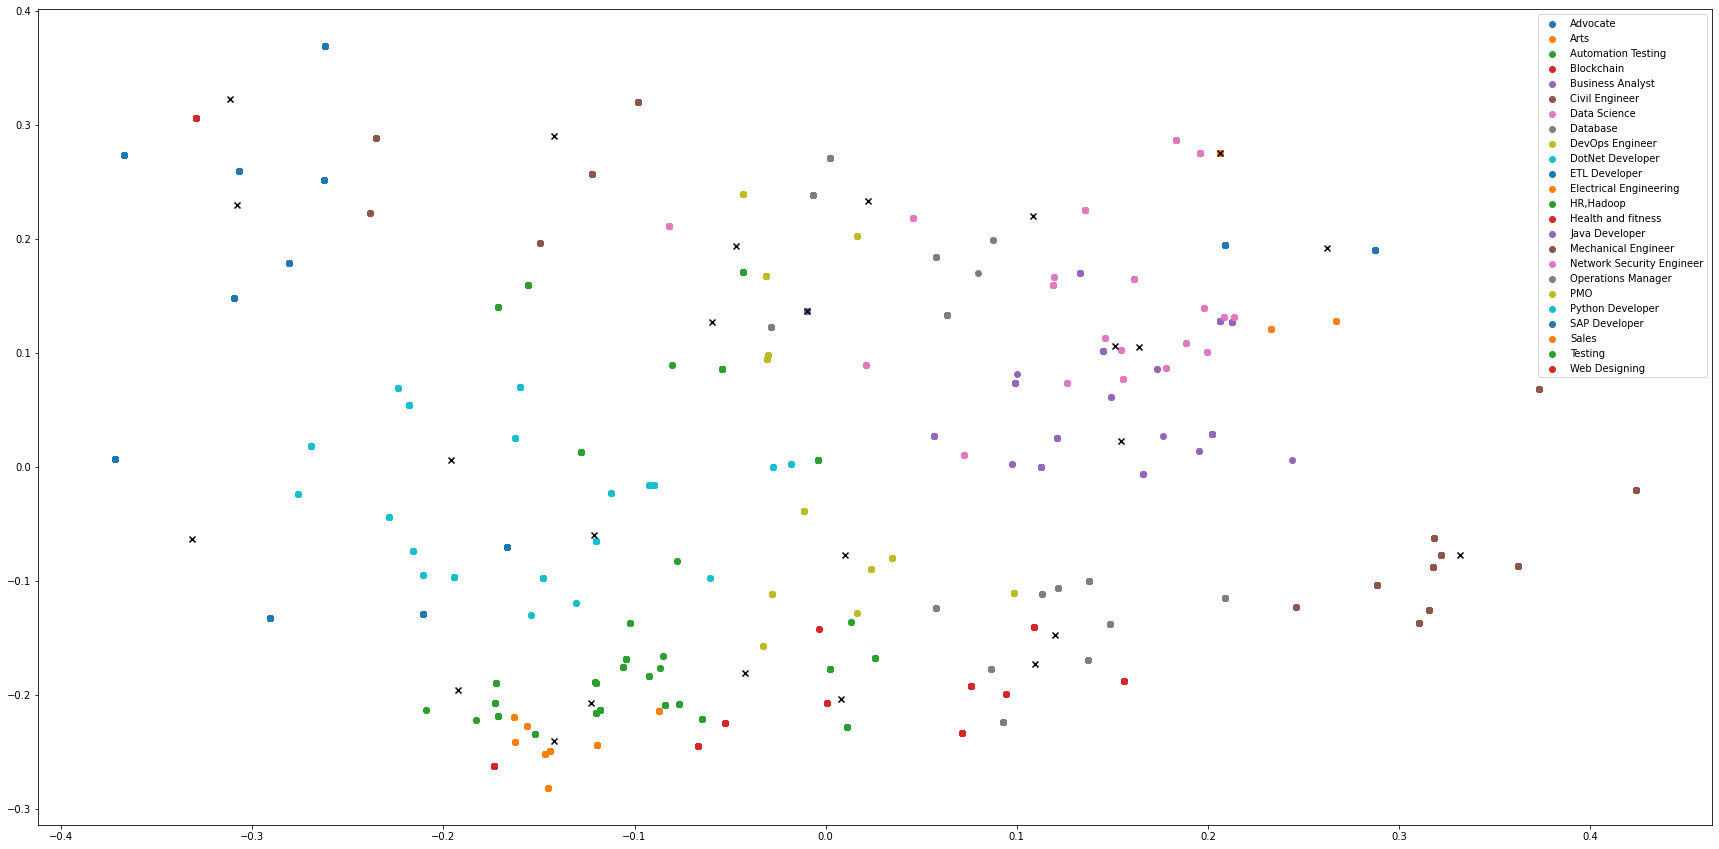

In [68]:
centers = np.array(km.cluster_centers_)
label = km.fit_predict(data_pca)
plt.figure(figsize=(30,15))
uniq = np.unique(label)
for i in uniq:
 
    
    plt.scatter(data_pca[label == i , 0] , data_pca[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend( ('Advocate','Arts','Automation Testing','Blockchain','Business Analyst','Civil Engineer','Data Science','Database','DevOps Engineer','DotNet Developer',
'ETL Developer','Electrical Engineering','HR,Hadoop','Health and fitness','Java Developer','Mechanical Engineer','Network Security Engineer','Operations Manager',
'PMO','Python Developer','SAP Developer','Sales','Testing','Web Designing'),loc='upper right')
plt.show()

plt.show()

In [44]:
uniq

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [45]:
df_t.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [46]:
df_t=df_t.drop(columns=['Category'])

In [47]:
df_t

,Resume
0,Skills * Programming Languages: Python (pandas...
1,Education Details \r\nMay 2013 to May 2017 B.E...
2,"Areas of Interest Deep Learning, Control Syste..."
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...
957,Computer Skills: â¢ Proficient in MS office (...
958,â Willingness to accept the challenges. â ...
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [48]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text
  

In [49]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) 
vect_text=vect.fit_transform(df_t['Resume'])

In [50]:
print(vect_text.shape)
print(vect_text)

(962, 1000)
  (0, 125)	0.044999556864727897
  (0, 797)	0.042957017331163846
  (0, 440)	0.041621857695136835
  (0, 961)	0.03120202001467949
  (0, 891)	0.05131869207353854
  (0, 328)	0.04518622943527653
  (0, 968)	0.025470365213264873
  (0, 555)	0.031023523182229087
  (0, 146)	0.04234554912719941
  (0, 147)	0.035545906468491484
  (0, 331)	0.028863417205638148
  (0, 816)	0.03432627666086681
  (0, 964)	0.024497469214433947
  (0, 783)	0.04219734348387247
  (0, 348)	0.044999556864727897
  (0, 357)	0.04205091280111631
  (0, 282)	0.028378162415266327
  (0, 375)	0.0993646652256571
  (0, 789)	0.04280125960861575
  (0, 115)	0.03967700296242844
  (0, 321)	0.03387056617945045
  (0, 42)	0.050820532074948355
  (0, 849)	0.09882720113469359
  (0, 467)	0.044634550181112814
  (0, 869)	0.049413600567346797
  :	:
  (961, 761)	0.0833999316306087
  (961, 638)	0.04605168642569403
  (961, 64)	0.042553063525240464
  (961, 314)	0.03862737497415527
  (961, 917)	0.07067193574396374
  (961, 213)	0.03947705944445613

In [51]:
idf=vect.idf_

In [52]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['company'])
print(dd['bods'])

company bods
1.0
6.260615499364025


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Latent Semantic Analysis (LSA)

In [53]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [54]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.31937473 -0.0394045   0.20111655 ...  0.00618435 -0.10572584
   0.10123607]
 [ 0.4289153   0.32783729  0.0332917  ...  0.05228366 -0.04192721
  -0.03475824]
 [ 0.51879351  0.3319768  -0.0045034  ... -0.03506626 -0.10761571
   0.06386764]
 ...
 [ 0.21918919 -0.19937739 -0.12147435 ... -0.20362394  0.13570331
  -0.0942897 ]
 [ 0.44844862  0.05157358 -0.22276432 ...  0.03242894 -0.03290412
   0.02218653]
 [ 0.40919335 -0.03882745  0.07783188 ... -0.090257    0.2450652
  -0.17563126]]
(962, 10)


In [55]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  

Document 0 :
Topic  0  :  31.937472813579532
Topic  1  :  -3.9404497871677386
Topic  2  :  20.111655017829342
Topic  3  :  8.456783571960512
Topic  4  :  4.92548380449851
Topic  5  :  -5.542957501911239
Topic  6  :  3.694753079453076
Topic  7  :  0.6184348981149346
Topic  8  :  -10.572583780067783
Topic  9  :  10.123606608789133


In [56]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 6.87716010e-03  3.44661550e-02  8.32573744e-03 ...  3.13951585e-02
   1.57045467e-01  2.13455389e-02]
 [-5.86790906e-03  1.97041119e-03 -9.15282918e-03 ...  2.03117896e-02
   2.31878332e-01  6.27433489e-05]
 [-2.67205975e-03  3.65631813e-03 -1.43611033e-03 ...  1.24687301e-02
   1.59531564e-02 -1.90865664e-02]
 ...
 [-2.83685464e-03 -7.66568909e-03 -1.97994409e-03 ... -2.85480934e-02
  -1.95185168e-02  9.75854703e-06]
 [ 1.64878306e-02 -4.97086497e-03 -4.79774738e-03 ...  3.74952661e-02
   7.09181274e-03  1.57788675e-03]
 [ 2.57706930e-02 -3.83912731e-02 -6.95041742e-03 ... -3.63989013e-02
  -2.08801421e-02 -1.27617193e-02]]


In [57]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
exprience months details project less java year company description january 

Topic 1: 
less java year exprience months developer python ajax spring jquery 

Topic 2: 
hadoop data hive database java sql sqoop using hdfs oracle 

Topic 3: 
hadoop data hive hdfs sqoop etl january spark informatica details 

Topic 4: 
sales less year data exprience hadoop hr manager months fitness 

Topic 5: 
less electrical year test testing months exprience automation python engineer 

Topic 6: 
ui project application photoshop com loan responsibility designed developed roles 

Topic 7: 
servers shell database python cloud mysql pune devops january linux 

Topic 8: 
etl informatica testing test hr sql mumbai january unix details 

Topic 9: 
etl informatica python pune developer mechanical sql feeds training sap 



## LDA 

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [59]:
lda_top=lda_model.fit_transform(vect_text)

In [60]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(962, 10)
[[0.00951354 0.00951419 0.00951486 ... 0.62505539 0.00951321 0.00951293]
 [0.01671286 0.01671993 0.01671035 ... 0.0167152  0.01670868 0.01670854]
 [0.01248733 0.01249028 0.01248863 ... 0.01249013 0.01248706 0.01248653]
 ...
 [0.01269376 0.0126945  0.0126933  ... 0.01269945 0.01269318 0.0126932 ]
 [0.01444078 0.01444205 0.01444064 ... 0.01444209 0.01444044 0.01444042]
 [0.01249129 0.01249178 0.01249118 ... 0.01249294 0.01249084 0.01249082]]


In [61]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0000000000000002


In [62]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.9513544272831751 %
Topic  1 :  0.9514188036863399 %
Topic  2 :  0.9514858062431563 %
Topic  3 :  0.9513846015620031 %
Topic  4 :  0.9513381739490309 %
Topic  5 :  29.883550528249632 %
Topic  6 :  0.9513143201608697 %
Topic  7 :  62.50553940596696 %
Topic  8 :  0.9513209926373818 %
Topic  9 :  0.9512929402614685 %


In [63]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.34297276 0.39210426 0.34546218 ... 0.36095345 1.8273731  0.53554968]
 [0.35583023 1.54483403 0.27698475 ... 0.83744297 6.01911192 2.50840087]
 [0.28574357 0.46931693 0.34678373 ... 0.36294523 0.6702518  0.36559046]
 ...
 [1.18705914 2.72778297 1.01940855 ... 0.72148268 2.26390541 0.93732376]
 [0.36421352 0.30887442 0.32295212 ... 0.3475512  0.40995401 0.39251398]
 [0.30605987 0.30968306 0.36426576 ... 0.38474675 0.39485275 0.39571082]]
(10, 1000)


In [64]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
exprience details less year arts months photoshop loan sales description 

Topic 1: 
fitness details electrical exprience java year less months civil january 

Topic 2: 
java hive data hadoop developer ajax user jquery used size 

Topic 3: 
operations management team sales billing manager monitor company services sla 

Topic 4: 
sales details mechanical hr engineering student finance company exprience january 

Topic 5: 
exprience months details testing maharashtra project january pune company java 

Topic 6: 
workshop days mechanical june design pune details hr college skills 

Topic 7: 
project data test database testing etl quality using sql informatica 

Topic 8: 
july days legal done hr details learning 30 mumbai 2016 

Topic 9: 
arts hr details company january paper fitness mumbai college 2012 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
  

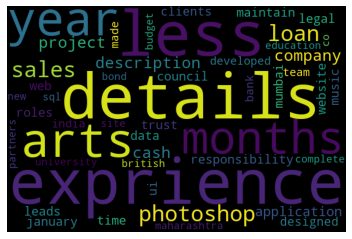

In [66]:
# topic 0
draw_word_cloud(0)

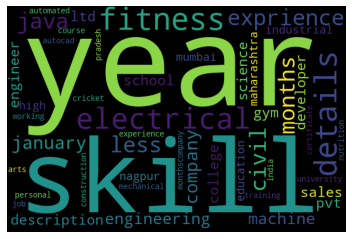

In [67]:
# topic 1
draw_word_cloud(1)  # ...